# Лабораторная работа
В рамках данной работы мы с вами будем реализовывать нейронную сеть с помощью библиотеки numpy.  

В данном ноутбуке вы найдете почти готовую к применению нейронную сеть, созданную для решения конкретной задачи на конкретном наборе данных. В некоторых местах данного ноутбука код пропущен и вместо него стоит заглушка "\<ENTER YOUR CODE HERE>". Это означает, что вместо этой заглушки вам необходимо написать собственный код, решающий какую-то конкретную подзадачу. Детали вы найдете в комментариях около каждого из таких мест.  

Давайте проверим, что у нас установлены все необходимые библиотеки.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

В данной лабораторной работе мы будем использовать достаточно простой набор данных. Этот набор будет состоять из 4-х экземпляров одного из двух классов, таким образом, решаемая нами задача - бинарная классификация.  

Сгенерируем данные самостоятельно.

In [3]:
a = np.array([
    0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
    0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
    0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
    0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
    1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
]).reshape(1, -1)

b = np.array([
    1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
    1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
    1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
    1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
    1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
    1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
    0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
]).reshape(1, -1)

c = np.array([
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
    0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
    0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
    0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
    0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
]).reshape(1, -1)

d = np.array([
    0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
    0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
    0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
    0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
    0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
    0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
    0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
    0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
    0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
    0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
]).reshape(1, -1)

# Набор векторов признаков для каждого из 4-х экземпляров
x = [a, b, c, d]

# Метки классов для каждого из 4-х экземпляров
y = np.array([0, 0, 1, 1])

Давайте визуализируем данные и проверим визуально, что классы легко различимы и сеть сможет с ними справиться.

Text(0.5, 1.0, 'Домик')

<Figure size 432x288 with 0 Axes>

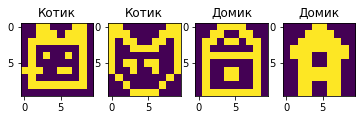

In [4]:
plt.figure()
f, axarr = plt.subplots(1, 4)
axarr[0].imshow(a[0].reshape(10, 10))
axarr[0].set_title('Котик')

axarr[1].imshow(b[0].reshape(10, 10))
axarr[1].set_title('Котик')

axarr[2].imshow(c[0].reshape(10, 10))
axarr[2].set_title('Домик')

axarr[3].imshow(d[0].reshape(10, 10))
axarr[3].set_title('Домик')

Итак, внимательно изучив предлагаемый набор данных, давайте подумаем о структуре нашей сети и ее "строительных элементах" - частях, из которых она будет состоять. Мы будем реализовывать эти части по очереди, проверяя, что они работают корректно, а затем использовать в последующих функциях.

Наш набор данных состоит из одномерного вектора длиной 100 элементов, следовательно размер входного слоя должен составлять 100 элементов. Нашей задачей является бинарная классификация объектов, где метка 0 обозначает котиков, а метка 1 - домики. Соответственно, на выходе нашей сети должен присутствовать только один нейрон, который будет выдавать значения от 0 до 1 - т.е. функцией нелинейности должна быть сигмоида.

Кроме того, мы будем использовать сигмоиду в качестве функции активации между слоями нашей сети, поэтому давайте реализуем ее в первую очередь. Напомним, что сигмоида выглядит следующим образом: $sigmoid(x)=\dfrac{1}{1+\exp(-x)}$. Кроме того, рекомендуем вам вспомнить, как выглядит градиент сигмоиды, т.к. его нам тоже необходимо реализовать.

In [5]:
# Реализуйте функцию сигмоиду, ...
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ...а также ее градиент
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [6]:
# Тесты предназначены для проверки того, что вы корректно реализовали функцию
assert np.isclose(sigmoid(0), 0.5)
assert np.isclose(sigmoid(1), 0.7310585786300049)

assert np.isclose(sigmoid_grad(0), 0.25)
assert np.isclose(sigmoid_grad(1), 0.19661193324148185)

Кроме функции активации нам понадобится функция генерации полносвязного слоя нейронов. Данная функция должна сгенерировать слой необходимого размера, заполнив его случайными значениями. Мы рекомендуем использовать для этого нормальное распределение с средним значением 0 и дисперсией 1.

Реализуйте функцию generate_layer(x, y), которая по заданным x и y (входному числу параметров и выходному числу параметров) будет генерировать случайный массив данных размера (x, y).

In [7]:
def generate_layer(x, y):
    return np.random.standard_normal((x, y))

In [9]:
# Данный тест проверяет вашу реализацию
assert generate_layer(5, 7).shape == (5, 7)

Далее давайте реализуем функцию ошибки для бинарной классификации. Из предыдущих курсов вы должны помнить, то подходящей функций ошибки в данном случае является функция бинарной кроссэнтропии. Давайте также реализуем ее отдельной функцией. Напомним, что в случае единственного экземпляра данных (а мы сейчас хотим реализовать ее для единственного экземпляра) ее функция будет выглядеть следующим образом:
$$crossentropy(y, \hat y) = - (y * log(\hat y) + (1-y)*log(1-\hat y))$$,
где $y$ - это правильное значение класса, а $\hat y$ - предсказанное моделью значение.

In [10]:
def loss(predicted, ground_truth):
    # binary crossentropy loss
    return -(ground_truth*np.log(predicted) + (1-ground_truth)*np.log(1 - predicted))

In [11]:
assert np.isclose(loss(0.5, 0), 0.6931471805599453)
assert np.isclose(loss(0.1, 1), 2.3025850929940455)

Итак, к настоящему моменту мы создали необходимые функции активации, потерь и генерации слоев. Теперь пришла пора переходить к созданию самой сети и ее функций.  

Для данного набора данных мы с вами будем использовать нейронную сеть состоящую из двух слоев. Первый слой будет состоять из 32-х нейронов, а второй - из одного нейрона и являться выходным слоем. Для упрощения вычислений будем использовать нейронный слой с весами, но без смещений. 

Давайте напишем функцию forward_pass, которая будет совершать прямой проход по нейронной сети и применять функции активации, а также возвращать два объекта:
 1. значения всех вычислений после применения функции активации
 2. кортеж всех промежуточных значений, полученных в процессе вычислений, чтобы мы могли использовать их для подсчета градиента

In [12]:
def forward_pass(data, weights_layer1, weights_layer2):
    # Предполагаем, что weights_layer1 и weights_layer2 - массивы весов корректных размеров
    
    # Пропустим данные через первый слой 
    # в матричном случае это означает матричное умножение данных на веса
    output1 = data@weights_layer1
    
    # Далее применим функцию активации к полученным данным
    activation1 = sigmoid(output1)
     
    # Далее пропустим аналогичным образом данные через второй слой
    output2 = activation1@weights_layer2
    
    # И снова применим функцию активации
    activation2 = sigmoid(output2)
    
    # вернем полученный результат
    result = activation2
    return result, (output1, activation1, output2, activation2)

Далее начинается сложная часть. Нам необходимо реализовать функцию обратного распространения ошибки. Данная функция будет принимать вектор X, правильный класс y, веса слоев 1 и 2 нейронной сети, а также learning rate - значение от 0 до 1, на которое будут домножаться градиенты для ограничения скорости градиентного спуска.

In [13]:
def back_propagation(x, y, weights_layer1, weights_layer2, learning_rate):
    # Давайте получим результат прямого прохода по нашей нейронной сети
    result, (output1, activation1, output2, activation2) = forward_pass(x, weights_layer1, weights_layer2) 

    # Далее посчитаем ошибку в каждом слое
    # ошибка в первом слое равна разнице между результатом и истинным значением
    d2 = result - y
    
    # Ошибка во втором слое считается чуть сложнее, поэтому мы реализовали ее за вас
    d1 = weights_layer2.dot(d2.T).T * sigmoid_grad(activation1)
 
    # Далее считаем градиенты для каждого из слоев
    w1_adj = x.T.dot(d1)            # градиент для первого слоя
    w2_adj = activation1.T.dot(d2)  # градиент для второго слоя
    
    # И давайте вычтем посчитанные градиенты из каждого из слоев, не забыв домножить их на learning_rate
    weights_layer1 -= learning_rate * w1_adj
    weights_layer2 -= learning_rate * w2_adj
    
    # После этого вернем новые значения весов для обоих слоев нейронной сети
    return weights_layer1, weights_layer2

In [14]:
# Тесты для проверки функции back_propagation
test_x = np.array([0.5, 0.1, 0.2, 0.3]).reshape(2, 2)
test_y = np.array([0])
test_w1 = np.array([0.11, 0.12, 0.13, -0.31, 0.44, -0.2]).reshape(2, 3)
test_w2 = np.array([0.33, -0.1, 0.95]).reshape(3, 1)

new_test_w1, new_test_w2 = back_propagation(test_x, test_y, test_w1, test_w2, 0.1)
assert new_test_w1.shape == test_w1.shape
assert new_test_w2.shape == test_w2.shape
assert np.allclose(new_test_w1, np.array([0.1065043, 0.12105125, 0.11995235, -0.31199363, 0.440597, -0.20572788]).reshape(2, 3))
assert np.allclose(new_test_w2, np.array([0.26649996, -0.16841221, 0.88557019]).reshape(3, 1))

In [15]:
def train(X, y, weights_layer1, weights_layer2, learning_rate = 0.01, epochs = 10):
    dataset_size = len(X)
    
    # Создаем переменные для сохранения истории метрики и функции потерь
    accuracy_history = []
    loss_history = []
    
    for epoch in range(epochs):
        epoch_loss = 0      # лосс текущей эпохи    
        correct_amount = 0  # количество верно классифицированных элементов
        
        # перемешаем набор данных
        random.shuffle(X)
        
        # будем последовательно брать каждый элемент 
        for i in range(dataset_size):
            # Совершаем прямой проход, подавая i-й элемент массива признаков  
            out, _ = forward_pass(X[i], weights_layer1, weights_layer2)
            
            # Добавляем значение функции потерь
            epoch_loss += np.squeeze(loss(out, y[i]))
            
            # Проверяем, классифицирован ли объект верно (т.е. оценка ближе к верному классу, чем к неверному)
            correct_amount += int(abs(np.squeeze(out) - y[i]) < 0.5)
            
            # Осуществляем градиентный спуск, используя i-й элемент массива признаков и классов 
            weights_layer1, weights_layer2 = back_propagation(X[i], y[i], weights_layer1, weights_layer2, learning_rate)
            
        # Вычисляем точность на текущей эпохи и сохраняем данные
        accuracy = correct_amount / dataset_size
        accuracy_history.append(accuracy)
        loss_history.append(epoch_loss)
        print(f"Epoch: {epoch + 1}/{epochs}, \t ======== accuracy: {accuracy}, loss: {epoch_loss}")

    return accuracy_history, loss_history, (weights_layer1, weights_layer2)

In [16]:
# Тест для проверки функции train
test_x = [np.array([0.2, 0.3]).reshape(1, 2)]
test_y = [np.array([0])]
test_w1 = np.array([0.11, 0.12, 0.13, -0.31, 0.44, -0.2]).reshape(2, 3)
test_w2 = np.array([0.33, -0.1, 0.95]).reshape(3, 1)

test_acc_h, test_l_h, (new_test_w1, new_test_w2) = train(test_x, test_y, test_w1, test_w2, 1, 1)
assert len(test_acc_h) == len(test_l_h) == 1
assert np.isclose(test_acc_h[0], 0.0)
assert np.isclose(test_l_h[0], 1.0196136855432536)
assert test_w1.shape == new_test_w1.shape
assert test_w2.shape == new_test_w2.shape
assert np.allclose(new_test_w1, np.array([[0.10004239, 0.12297504, 0.10139734], [-0.32493642, 0.44446255, -0.24290399]]))
assert np.allclose(new_test_w2, np.array([[0.02170934], [-0.44451379], [0.63580037]]))

Epoch: 1/1, 	 ======== accuracy: 0.0, loss: 1.0196136855432536


Итак, настало время создать нашу нейронную сеть и обучить ее на нашем наборе данных.

In [17]:
# создадим слои нейронной сети с нужным количеством параметров
layer1 = generate_layer(100, 32)  # в первом слое - 32 нейрона
layer2 = generate_layer(32, 1)    # в втором слое - 1 нейрон

# зададим learning rate и количество эпох
learning_rate = 0.1
epochs = 10

# и запустим процесс обучения
accuracy_history, loss_history, (layer1, layer2) = train(x, y, layer1, layer2, learning_rate, epochs)

Epoch: 1/10, 	 ======== accuracy: 0.5, loss: 7.77586288471584
Epoch: 2/10, 	 ======== accuracy: 0.5, loss: 6.120506447408488
Epoch: 3/10, 	 ======== accuracy: 0.75, loss: 1.828475810741439
Epoch: 4/10, 	 ======== accuracy: 0.5, loss: 8.924594062420846
Epoch: 5/10, 	 ======== accuracy: 0.5, loss: 5.891631075591821
Epoch: 6/10, 	 ======== accuracy: 0.5, loss: 3.335673740482885
Epoch: 7/10, 	 ======== accuracy: 0.5, loss: 4.129757580401247
Epoch: 8/10, 	 ======== accuracy: 0.75, loss: 1.5646172838009962
Epoch: 9/10, 	 ======== accuracy: 0.0, loss: 12.475459250680881
Epoch: 10/10, 	 ======== accuracy: 0.25, loss: 6.425334770336752


Давайте визуализируем полученные графики точности и функции потерь.

<Figure size 720x288 with 0 Axes>

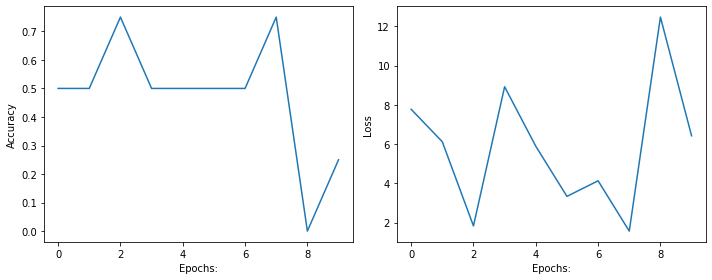

In [18]:
# изменим размер изображения в jupyter notebook
plt.rcParams['figure.figsize'] = [10, 4]

plt.figure()
fig, axarr = plt.subplots(1, 2)
axarr[0].plot(accuracy_history)
axarr[0].set_ylabel('Accuracy')
axarr[0].set_xlabel("Epochs:")

axarr[1].plot(loss_history)
axarr[1].set_ylabel('Loss')
axarr[1].set_xlabel("Epochs:")

plt.tight_layout()
plt.show()

Для визуальной оценки набора данных давайте отобразим предсказание сети для каждого из элементов массива признаков.

In [19]:
def predict(x, weights_layer1, weights_layer2):
    plt.figure()
    fig, axarr = plt.subplots(1, len(x))
    
    for i, v in enumerate(x):
        out, _ = forward_pass(v, weights_layer1, weights_layer2)
        label = "Домик" if out[0][0] > 0.5 else "Котик"
        axarr[i].imshow(v.reshape(10, 10))
        axarr[i].set_title(label)
        
    plt.show()   

<Figure size 720x288 with 0 Axes>

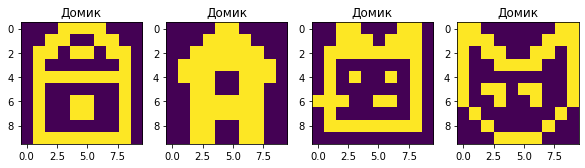

In [20]:
predict(x, layer1, layer2)

Итак, мы надеемся, что у вас успешно получилось реализовать простую нейронную сеть с помощью библиотеки NumPy и наших подсказок в процессе разработки, и натренировать ее для успешного распознавания котиков и домиков. :)

К счастью, вам вряд ли еще раз придется это делать. К настоящему времени в мире разработано достаточно много фреймворков глубокого обучения, позволяющих автоматизировать и упростить все вышепроделанные операции. О них речь пойдет в следующей главе.

Успехов!